# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [ ]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
# randomly select 10 rows
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425,2
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,2
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,2
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714,1
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,1
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,0
154,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640,2
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,0
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520,2
143,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550,2


In [2]:
# show first 5 rows
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
# explore the dataset - 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [4]:
# explore the dataset - 2
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<Axes: xlabel='WineVariety'>

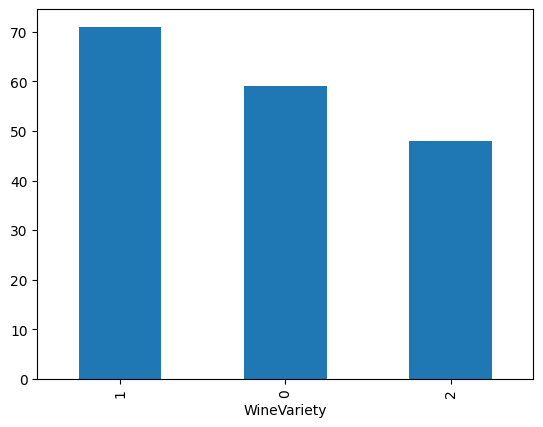

In [ ]:
# explore the dataset - 3
# plot histogram of WineVariety (label, categorical data)
data['WineVariety'].value_counts().plot(kind='bar')

Alcohol                          Axes(0.125,0.712609;0.168478x0.167391)
Malic_acid                    Axes(0.327174,0.712609;0.168478x0.167391)
Ash                           Axes(0.529348,0.712609;0.168478x0.167391)
Alcalinity                    Axes(0.731522,0.712609;0.168478x0.167391)
Magnesium                        Axes(0.125,0.511739;0.168478x0.167391)
Phenols                       Axes(0.327174,0.511739;0.168478x0.167391)
Flavanoids                    Axes(0.529348,0.511739;0.168478x0.167391)
Nonflavanoids                 Axes(0.731522,0.511739;0.168478x0.167391)
Proanthocyanins                   Axes(0.125,0.31087;0.168478x0.167391)
Color_intensity                Axes(0.327174,0.31087;0.168478x0.167391)
Hue                            Axes(0.529348,0.31087;0.168478x0.167391)
OD280_315_of_diluted_wines     Axes(0.731522,0.31087;0.168478x0.167391)
Proline                              Axes(0.125,0.11;0.168478x0.167391)
dtype: object

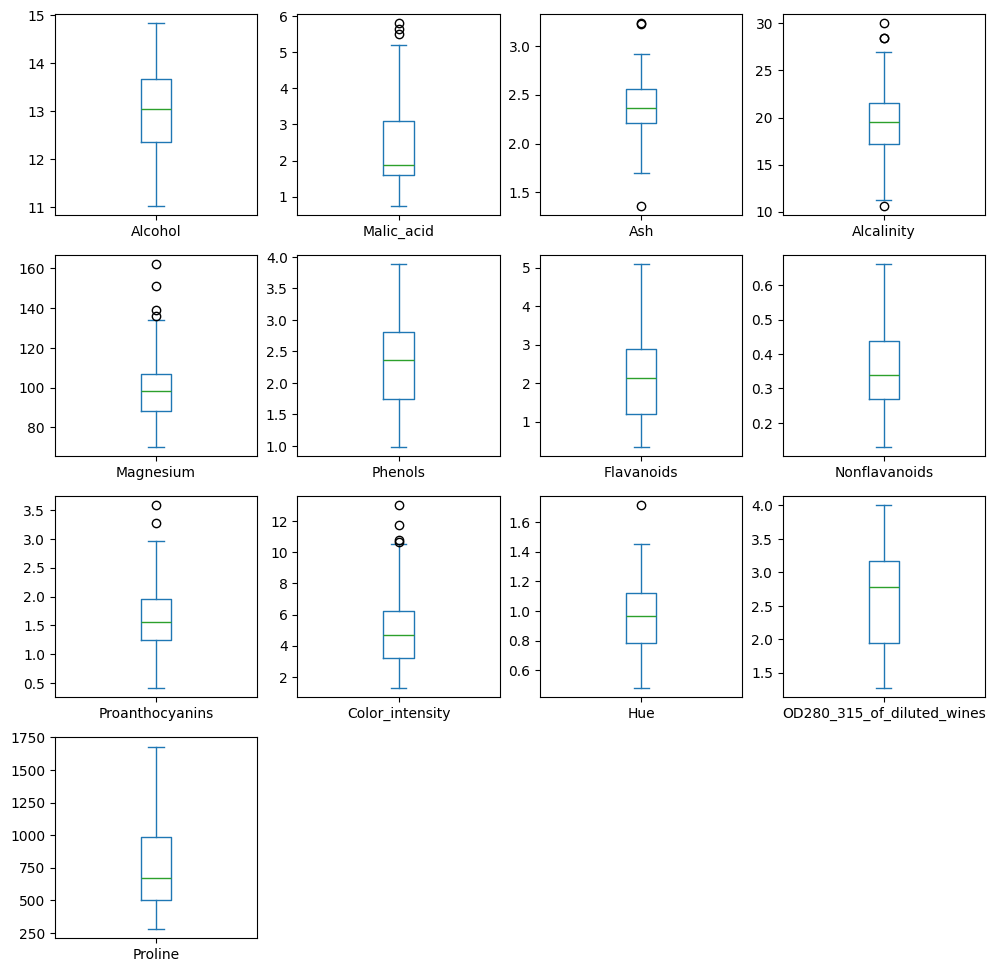

In [13]:
# Create a DataFrame without WineVariety (label)
X = data.drop('WineVariety', axis=1)
# Create a Series with only WineVariety (label)
y = data['WineVariety']
# Boxplot of the features
X.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,12), sharex=False, sharey=False)  

Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [14]:
# Your code to evaluate data, and train and evaluate a classification model
# choose a classification model
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# save the model
model_filename = 'models/wine_model.pkl'
joblib.dump(model, model_filename)


[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



['models/wine_model.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [15]:
# Your code to predict classes for the two new samples
# Create X_new
import numpy as np
X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])   
# load the model
model = joblib.load(model_filename) 

# Fix the warnings about missing column names
X_new_df = pd.DataFrame(X_new, columns=X.columns)
new_predictions = model.predict(X_new_df)
print("\nNew predictions:\n", new_predictions)

# show existing predictions
# print("\nPrevious predictions:\n", predictions[:5])
# make predictions
# new_predictions = model.predict(X_new)
# print("\nNew predictions:\n", np.round(new_predictions, 2)) 


New predictions:
 [0 1]
